# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

In [2]:
import numpy as np              # Importa la biblioteca NumPy para operaciones numéricas eficientes.
import pandas as pd             # Importa la biblioteca Pandas para manipulación y análisis de datos.
import statsmodels.api as sm   # Importa statsmodels para análisis estadístico y modelado.
import matplotlib.pyplot as plt # Importa la biblioteca Matplotlib para visualización de datos.
import seaborn as sns           # Importa la biblioteca Seaborn para visualización estadística mejorada.

# A continuación, se configura Seaborn para que las visualizaciones sigan su estilo por defecto, que suele ser más atractivo que el estilo por defecto de Matplotlib.
sns.set()

## Load the data

In [3]:
# Cargar los datos desde un archivo .csv en la misma carpeta. ¡Aún no se llama 'data' debido a que haremos un preprocesamiento!
raw_data = pd.read_csv('1.03. Dummies.csv') # Vamos a revisar qué hay dentro de este marco de datos

In [17]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


## Map the data

In [20]:
# Mappear todas las entradas 'No' con 0, y todas las entradas 'Yes' con 1. Pon eso en una nueva variable llamada 'data'
# Ten en cuenta que data es una copia de raw_data, debido a cómo funcionan los punteros en Python
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [19]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [7]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarmente, nuestra variable independiente (x) es la puntuación SAT
x1 = data[['SAT', 'Attendance']]  # Agregamos una constante. Básicamente, estamos añadiendo una nueva columna (con la misma longitud que x)

In [21]:
# Agregamos una constante. Básicamente, estamos añadiendo una nueva columna (con la misma longitud que x), que consiste únicamente de 1s
x = sm.add_constant(x1)

# Ajustamos el modelo, de acuerdo con el método de MCO (mínimos cuadrados ordinarios) con una variable dependiente y una independiente x
results = sm.OLS(y, x).fit()

# Imprimimos un resumen detallado de la regresión.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.19e-15
Time:                        10:33:53   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the regression line(s) on the scatter plot

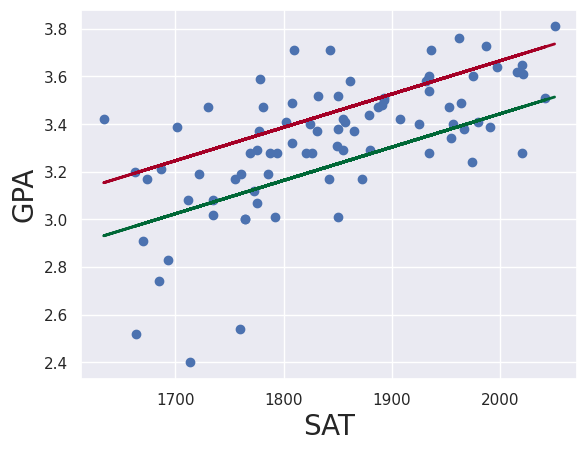

In [22]:
# Crear un gráfico de dispersión de SAT y GPA
plt.scatter(data['SAT'], y)

# Definir las dos ecuaciones de regresión, dependiendo de si asistieron (sí), o no (no)
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

# Graficar las dos líneas de regresión
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026')

# Nombrar tus ejes :)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

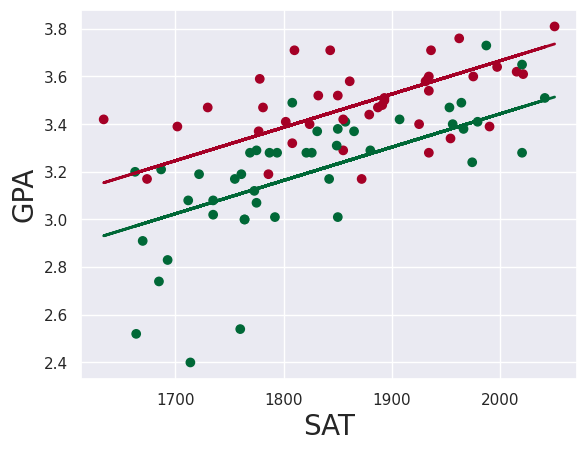

In [23]:
# En este código quiero colorear los puntos dependiendo de la asistencia
# Nota: Este código habría sido muy fácil de hacer en Seaborn

# Crear un gráfico de dispersión que contenga todas las observaciones
# Utilizar la serie 'Attendance' como color, y elegir un mapa de colores de tu elección
# El mapa de colores que hemos elegido es completamente arbitrario
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='RdYlGn_r')

# Definir las dos ecuaciones de regresión (una con una variable dummy = 1, la otra con dummy = 0)
# Ya las tenemos arriba, pero por consistencia, también las incluiremos aquí
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

# Graficar las dos líneas de regresión
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Add the original regression line

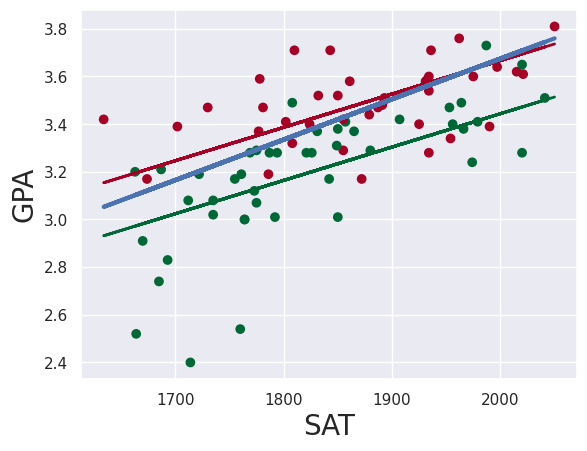

In [24]:
# Igual que arriba, esta vez estamos incluyendo la línea de regresión SIN las variables dummy.

# En este código quiero colorear los puntos dependiendo de la asistencia
# Nota: Este código habría sido muy fácil de hacer en Seaborn

# Crear un gráfico de dispersión que contenga todas las observaciones
# Utilizar la serie 'Attendance' como color, y elegir un mapa de colores de tu elección
# El mapa de colores que hemos elegido es completamente arbitrario
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='RdYlGn_r')

# Definir las dos ecuaciones de regresión (una con una variable dummy = 1, la otra con dummy = 0)
# Ya las tenemos arriba, pero por consistencia, también las incluiremos aquí
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

# Línea de regresión original
yhat = 0.0017 * data['SAT'] + 0.275

# Graficar las dos líneas de regresión
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837', label='línea de regresión 1')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026', label='línea de regresión 2')

# Graficar la línea de regresión original
fig = plt.plot(data['SAT'], yhat, lw=3, c='#4C72B0', label='línea de regresión original')

plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# How to make predictions based on the regressions we create

In [25]:
# Veamos qué hay dentro de la variable independiente.
# La primera columna proviene del método 'add_constant'. ¡Son solo unos, te lo dije!
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [26]:
# Crear un nuevo DataFrame, idéntico en organización a X.
# La constante siempre es 1, mientras que cada línea corresponde a una observación (estudiante)
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0, 1]})

# Por defecto, cuando creas un DataFrame (no lo cargas, sino que lo creas), las columnas se ordenan alfabéticamente.
# Entonces, si no las reordenamos, serían 'Attendance', 'const', 'SAT'.
# Si las proporcionas en el orden incorrecto, obtendrás resultados incorrectos.
new_data = new_data[['const', 'SAT', 'Attendance']]

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [28]:
# Estoy cambiando los nombres de los índices para los propósitos de este ejemplo.
# Esto no es realmente una buena práctica => No sobrescribiré la variable.
# Si quiero usar métodos de NumPy, sklearn, etc. en un df con índices renombrados, simplemente se perderán
# y se devolverán a 0,1,2,3, etc.
new_data.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [30]:
# Utiliza el método predict en la regresión con los nuevos datos como un único argumento
predictions = results.predict(new_data)

# El resultado
predictions

0    3.023513
1    3.204163
dtype: float64

In [32]:
# Creamos un DataFrame que incluya las predicciones
predictionsdf = pd.DataFrame({'Predictions': predictions})

# Unimos los dos DataFrames
joined = new_data.join(predictionsdf)

# Renombramos los índices como antes (no es una buena práctica en general)
# Esto es solo para ilustrar el proceso, ya que podría causar problemas si se utilizan métodos de otras bibliotecas
joined.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
